# Lab 4: Binomial distribution, Geometry distribution and Poisson distribution

Like the previous lab, we want to put all of our imported packages towards the top of the lab in a cell that's easy to run as needed. This way we have access to all the methods we need right from the start.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
print ("Modules Imported!")

Modules Imported!


## Binomial Distribution:

These were just the basics of file loading and saving. Depending on formatting and other issues, it may be necessary to dive into these modules a bit deeper to better suit your circumstances. However, this is a very good start to being able to use I/O.

If $n$ independent trials are conducted, each with success probability $p,$  then the number of successes has the binomial distribution with parameters $n$ and $p.$   For example, say you were to roll a die eight times, what's the probability you get six showing on exactly five of the rolls? For each trial, $P\{X=6\}=\frac{1}{6}$. So in eight trials the probability you would get exactly five sixes is: $p_x(k)=\binom{n}{k}p^k(1-p)^{n-k}=\binom{8}{5}\left(\frac{1}{6}\right)^5\left(\frac{5}{6}\right)^3.$
Here, $\binom{n}{k}$ represents a binomial coefficient, defined by $\binom{n}{k}=\frac{n!}{k!(n-k)!}.$  Like the Bernoulli distribution, the stats package has an object for the Binomial distribution.

In [2]:
#Calculates the probability of getting 5 sixes in 8 trials of a standard die roll
n = 8
p = 1./6
our_binom = st.binom(n,p) #Creates an instance of the binomial distribution object from
                  #the general binomial distribution object by freezing n and p to the values we want
print ('P{X=5}=',our_binom.pmf(5)) #Prints the probability that X=5

P{X=5}= 0.004167619265355891


Now it's your turn.  The idea of the following problem is for you to create a binomial distribution object for specific parameter values in two different ways.   The first way is as in the previous cell. The other way, is for you to build essentially the same object using the way you defined an object for the roll of a fair die,   which requires you to use the above formula for the binomial distribution. 
<br>

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** I'm going to roll a standard die 20 times and count how many times I roll a 4,5 or 6.

<html>
    <body>
        <ol>
            <li> Using the st.binom object, create a specialized object my_binom1 for the distribution by freezing n and p to appropriate values. </li>
            <li> Using the formula for Binomial distribution above and the class st.rv_discrete, create your own specialized <strong>object </strong> my_binom2 that represents the same distribution. (Hint: The whole point of this problem is to build up an object that behaves that same as the one produced by st.binom in (1) <I>without relying on st.binom at all.</I> You need to determine your own c and p vectors.) </li>
            <li> Print the probability that you roll a $4$, $5$, or $6$ an even number of times out of the 20 rolls. Do this calculation using my_binom1 and then again using my_binom2 with the .pmf() function.
            Do your calculations agree?</li>
        </ol>
    </body>
</html>

In [4]:
########Student Answer##############
####################################

#### Method 1: use the st.binom object #####
n = 20
p_success = 3.0/6.0
my_binom1 = st.binom(n,p_success)

### Method 2: custom the values and corresponding probabilities of the rv ######

def factorial(n):
    # Input: integer n 
    # Output: n!
    ans = 1
    for i in range(2, int(n+1)):
        ans *= i
    return ans
    
def nchoosek(n,k):
    # Input: integer n, integer k, where 0 <= k <= n.
    # Output: the number of ways to choose k balls from n distinct balls.
    return factorial(n) / (factorial(k) * factorial(n-k))

c_vals = np.arange(0, n+1)
pmf_vals = np.array([nchoosek(n, k) * p_success**k * (1-p_success)**(n-k) for k in c_vals])
my_binom2 = st.rv_discrete(name='my_binom2', values=(c_vals, pmf_vals))

even_ks = np.arange(0, n+1, 2)
prob_even_1 = my_binom1.pmf(even_ks).sum()
prob_even_2 = my_binom2.pmf(even_ks).sum()
print(f"Probability of Method 1: {prob_even_1}, Probability of Method 2: {prob_even_2}")
print("Are the two methods equal? ", np.isclose(prob_even_1, prob_even_2))

Probability of Method 1: 0.5000000000000002, Probability of Method 2: 0.5
Are the two methods equal?  True


__Answer:__ (Your answer here)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## Geometric Distribution

The Geometric distribution is a discrete probability distribution that models the number of successive Bernoulli trials required to achieve the first success. In contrast to the Binomial distribution, which calculates the probability of *k* successes in *n* trials, the Geometric distribution focuses on the trial number of the *first* success.

Each trial must be independent, have only two possible outcomes (success or failure), and have a constant probability of success, `p`.

**Definition:**
A random variable `X` follows a Geometric distribution with parameter `p` if its probability mass function (PMF) is given by:
$$P(X=k) = (1-p)^{k-1}p$$
where:
* `p` is the probability of success on a single trial.
* `k` is the trial number on which the first success occurs (`k` can be 1, 2, 3, ...).

**Key Properties:**
* **Mean (Expected Value):** $E[X] = \frac{1}{p}$
* **Variance:** $Var(X) = \frac{1-p}{p^2}$
* **Memoryless Property:** The probability of a success in the next trial is independent of the number of failures that have already occurred.

### Example Problem

A source is transmitting bits of data. The probability of a bit being transmitted with an error is 0.05. What is the probability that the fifth bit sent is the first one with an error?

In [5]:
# Solution for the Example Problem

# A "success" is defined as a bit being transmitted with an error.
p = 0.05  # Probability of success
k = 5     # The trial number of the first success

# Using the geometric distribution PMF: P(X=k) = (1-p)^(k-1) * p
probability = (1 - p)**(k - 1) * p

# Calculation
# probability = (0.95)**4 * 0.05
# probability = 0.81450625 * 0.05
# probability = 0.0407253125

print(f"The probability that the fifth bit is the first one with an error is: {probability:.6f}")

The probability that the fifth bit is the first one with an error is: 0.040725


<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>**
An engineer is testing a new type of CPU chip. According to manufacturing standards, the probability that any given chip is defective is `p = 0.1`. The engineer will continue to test new chips until the first defective one is found.

1.  What is the probability that the engineer finds the first defective chip on the 7th test?
2.  On average, how many chips should the engineer expect to test to find the first defective one?
3.  What is the probability that the first defective chip is found within the first 5 tests (inclusive)?

In [6]:
########Student Answer#############
p = 0.1
prob_k7 = (1-p)**6 * p
expected_trails = 1.0 / p
prob_within5 = 1 - (1-p)**5

print(f"P(first defective on 7th) = {prob_k7:.6f}")
print(f"Expected trials = {expected_trails:.6f}")
print(f"P(defective within 5 trials) = {prob_within5:.6f}")

P(first defective on 7th) = 0.053144
Expected trials = 10.000000
P(defective within 5 trials) = 0.409510


__Answer:__ (Your answer here)

## Poisson distribution as limit of binomial distribution

There is yet another important piece to this puzzle, and that is the Poisson distribution. The Poisson distribution has a single parameter $\lambda$ and a probability mass function given by: $p(k) = \frac{e^{-\lambda}\lambda^k}{k!}$ for $k\geq 0.$ The parameter $\lambda$ represents a mean such as the number of hits of a website in one minute, or the number of mispelled words in a document. Thus $p(k)$ represents the probability the number of events occuring is $k$ given that the average number events that occur is $\lambda$. The Poisson distribution is frequently used because it is a good approximation for the binomial distribution when $n$ is large, $p$ is small, and $np \approx \lambda$.  It is simpler than the binomial; it only has one parameter and it doesn't involve binomial coefficients. Let's say you create a website and that your website gets on average of 1200 hits per day. This is set up as a Poisson distribution where $\lambda = 1200$, but we can also model this as a binomial. If we were to break down the day into minute increments then the probability that a hit occurs in any given minute is $p = \frac{1200}{24*60} = \frac{5}{6}$ and there are $n = 24*60 = 1440$ minutes in a day. Below is a graph of this binomial approximation of the Poisson.

p = 0.8333333333333334


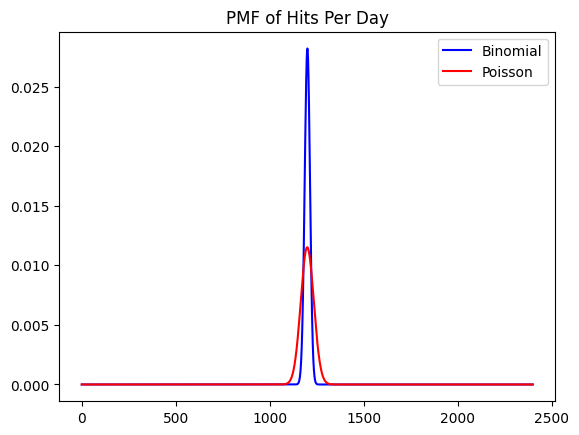

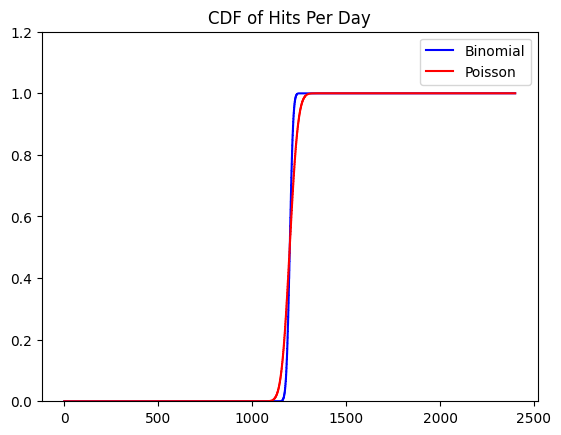

In [7]:
lamb =1200 #Average number of hits per day
n = 60*24. #Number of minutes in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

k = range(2*lamb)
plt.plot(k,st.binom.pmf(k,n,p), 'b', label = 'Binomial')
plt.plot(k,st.poisson.pmf(k,lamb), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,st.binom.cdf(x,n,p), 'b', label = 'Binomial')
plt.plot(x,st.poisson.cdf(x,lamb), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

These two distributions don't really look that close to each other. Why is that? In order for this approximation to be accurate, we require that $n$ be large, $p$ be small, and $np \approx \lambda$. Here $n$ is fairly large but $p$ is not close to zero at all.  The variance of the Poisson(1200) distribution is 1200, while the variance of the Binom(1440,5/6) distribution is only 1440*(5/6)*(1/6)=200. Clearly, we haven't broken the day up into small enough increments.  So let's now break it up into seconds.

p = 0.013888888888888888


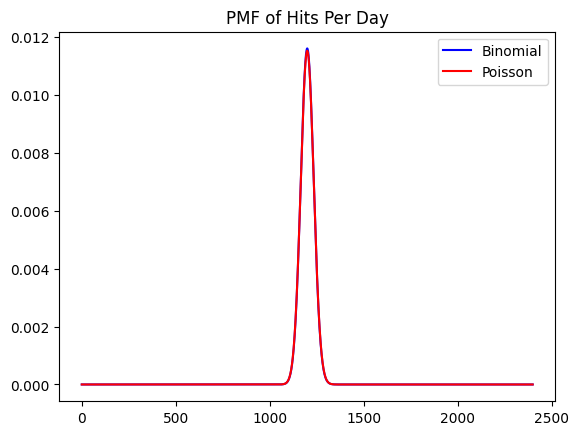

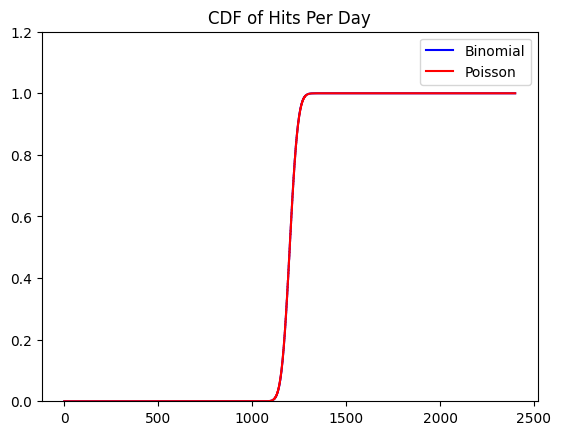

In [8]:
lamb = 1200 #Average number of hits per day
n = 60*60*24. #Number of seconds in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

X = st.binom(n,p)
Y = st.poisson(lamb)

k = range(2*lamb)
plt.plot(k,X.pmf(k), 'b', label = 'Binomial')
plt.plot(k,Y.pmf(k), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,X.cdf(x), 'b', label = 'Binomial')
plt.plot(x,Y.cdf(x), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

Now our approximation is so close that the two distributions are almost indistinguishable from each other. If we kept increasing n and decreasing p we would find that the approximation continues to improve. So, symbolically, $\lim_{n\to \infty, p\to  0, np \to \lambda} Binom(n,p) = Pois(\lambda).$  If you encounter a binomial variable with large $n$ and small $p,$ it may be easier to calculate probabilities based on the Poisson distribution.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** While working on a new research project, I have a probability of 𝑝=.017 of successfully analyzing a dataset during any given minute. Suppose there are 340 datasets that need to be analyzed, and I have 10 weeks to complete the project (assuming I work 35 hours per week). What's the probability that I will complete the project before the deadline? Equivalently, what is the probability that I analyze at least 340 datasets? To answer this question, do the following:
<html>
    <body>
        <ol>
            <li> Create a binomial variable X to represent the number of datasets I analyze (for this and other parts of the
            problem, assume I keep working at the same rate if I finish analyzing 340 datasets).</li>
            <li> Create a Poisson variable Y to represent the same number, using the Poisson approximation.
            Make sure to print out what $\lambda$ is.</li>
            <li> Find the probability of my success (i.e. analyzing at least 340 datasets) using the CDFs of each RV. Do they agree?</li>
            <li> Find the probability that I analyze exactly 340 datasets using the pmf of each RV.  Do they agree? </li>
        </ol>
    </body>
</html>

In [11]:
########Student Answer#############
p = 0.017
minutes = 10 * 35 * 60
n = int(minutes)

X = st.binom(n, p)
lambda_ = n * p
Y = st.poisson(lambda_)
print(f"lambda (Poisson) = {lambda_}")

k = 340
prob_binom = 1 - X.cdf(k - 1)
prob_poisson = 1 - Y.cdf(k - 1)
print(f"P(X >= {k}) using Binomial: {prob_binom:.6f}")
print(f"P(X >= {k}) using Poisson: {prob_poisson:.6f}")
print(f"Do they agree? {np.isclose(prob_binom, prob_poisson, rtol=1e-2)}")

prob_binom_k = X.pmf(k)
prob_poisson_k = Y.pmf(k)
print(f"P(X = {k}) using Binomial: {prob_binom_k:.6f}")
print(f"P(X = {k}) using Poisson: {prob_poisson_k:.6f}")
print(f"Do they agree? {np.isclose(prob_binom_k, prob_poisson_k, rtol=1e-2)}")

lambda (Poisson) = 357.0
P(X >= 340) using Binomial: 0.824631
P(X >= 340) using Poisson: 0.822524
Do they agree? True
P(X = 340) using Binomial: 0.014352
P(X = 340) using Poisson: 0.014336
Do they agree? True


__Answer:__ (Your answer here)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 